Zadanie 3. Preprocessing
Załóż, że docelowym zadaniem jest odczytanie tekstu przez model CV. Twoim zadaniem jest przygotowanie obrazu do tego kroku.
1. Wczytaj obraz z pliku - 'pexels-photo-6238297.jpeg'.
2. Korzystając z poznanych narzędzi, wybierz stosowne, aby docelowy obraz był czarnym tekstem na białym tle, bez szumów.
- filtry splotowe;
- wyrównanie histogramu;
- progowanie;
- operacje morfologiczne;
(Można zrobić na kilka sposobów, więc jak ktoś skończy, to może spróbować inny sposób, inne parametry metod itp.)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Wczytanie obrazu
image_path = 'pexels-photo-6238297.jpeg'
image = cv2.imread(image_path)

In [4]:
# Konwersja obrazu na odcienie szarości
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
# Filtr splotowy - Rozmycie Gaussa
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

In [6]:
# Wyrównanie histogramu
equalized_image = cv2.equalizeHist(blurred_image)

In [7]:
# Progowanie adaptacyjne
threshold_image = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

In [8]:
# Operacje morfologiczne - Zamknięcie
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed_image = cv2.morphologyEx(threshold_image, cv2.MORPH_CLOSE, kernel)

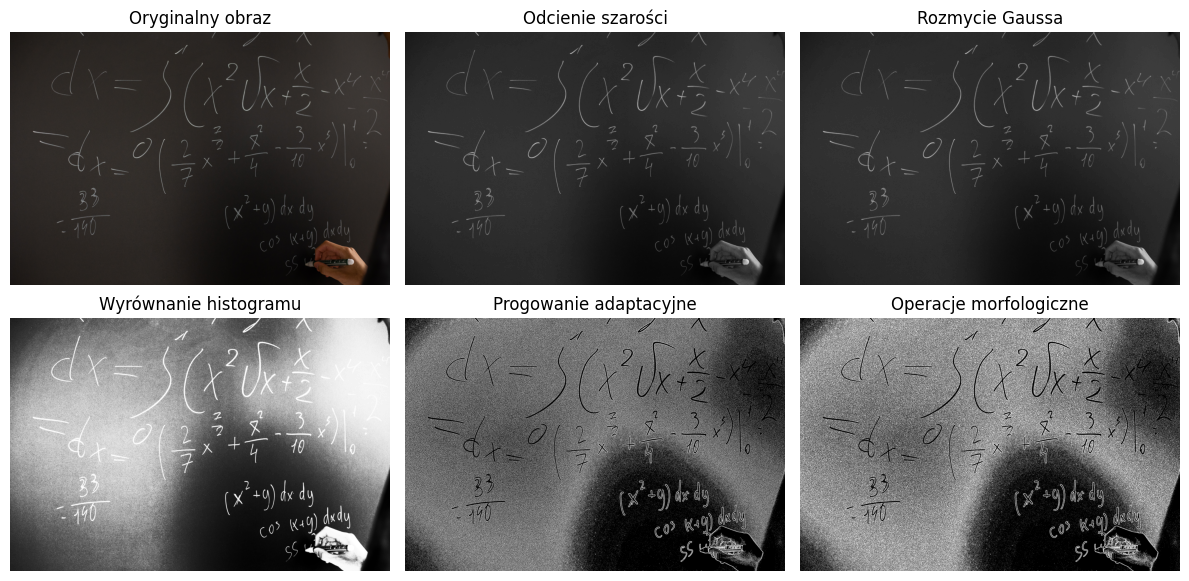

In [9]:
# Wyświetlenie obrazów
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Oryginalny obraz")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Odcienie szarości")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title("Rozmycie Gaussa")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(equalized_image, cmap='gray')
plt.title("Wyrównanie histogramu")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(threshold_image, cmap='gray')
plt.title("Progowanie adaptacyjne")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(closed_image, cmap='gray')
plt.title("Operacje morfologiczne")
plt.axis('off')

plt.tight_layout()
plt.show()